<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

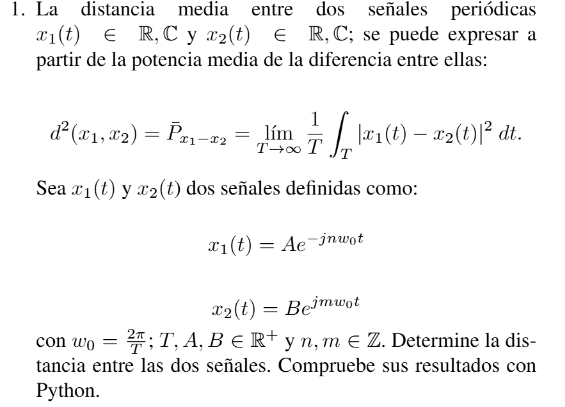

In [2]:
#primero importaremos las librerias necesarias para resolver el parcial
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist
import sympy as sp  # Importamos SymPy para trabajar con álgebra simbólica
import matplotlib.pyplot as plt # Importamos matplotlib para graficar (opcional para visualización)

In [23]:
import numpy as np
from scipy.integrate import quad

def calculate_analytical_distance(A, B, n, m):
    """
    Calcula la distancia usando la fórmula analítica derivada.
    """
    if n == -m:
        # Caso no ortogonal: d = |A - B|
        return np.abs(A - B)
    else:
        # Caso ortogonal: d = sqrt(A^2 + B^2)
        return np.sqrt(A**2 + B**2)

def calculate_numerical_distance(A, B, n, m, T=2*np.pi):
    """
    Calcula la distancia realizando la integración numérica de la definición.
    """
    # Definimos la frecuencia fundamental w0
    w0 = 2 * np.pi / T

    # El integrando es el cuadrado del valor absoluto de la diferencia de las señales
    # |x1(t) - x2(t)|^2
    integrand = lambda t: np.abs(A * np.exp(-1j * n * w0 * t) - B * np.exp(1j * m * w0 * t))**2

    # Realizamos la integración numérica desde 0 hasta T
    # quad devuelve una tupla (resultado, error)
    integral_result, _ = quad(integrand, 0, T)

    # La distancia al cuadrado es el resultado de la integral sobre el período
    d_squared = integral_result / T

    # La distancia es la raíz cuadrada
    return np.sqrt(d_squared)

# Verificación
# Parámetros para los ejemplos
A_val = 4.0
B_val = 3.0
T_val = 5.0 # El valor del período no afecta el resultado final

# --- Caso 1: n != -m (Señales ortogonales) ---
n1, m1 = 2, 3
print("--- Caso 1: n != -m (Ortogonal) ---")
print(f"Parámetros: A={A_val}, B={B_val}, n={n1}, m={m1}")

# Resultados
analytical_1 = calculate_analytical_distance(A_val, B_val, n1, m1)
numerical_1 = calculate_numerical_distance(A_val, B_val, n1, m1, T_val)

print(f"Distancia Analítica (sqrt(A^2+B^2)): {analytical_1:.6f}")
print(f"Distancia Numérica (Integración):     {numerical_1:.6f}")
print(f"¿Los resultados coinciden? {'Sí' if np.isclose(analytical_1, numerical_1) else 'No'}")
print("-" * 40)


# --- Caso 2: n = -m (Señales no ortogonales) ---
n2, m2 = 5, -5
print("--- Caso 2: n = -m (No Ortogonal) ---")
print(f"Parámetros: A={A_val}, B={B_val}, n={n2}, m={m2}")

# Resultados
analytical_2 = calculate_analytical_distance(A_val, B_val, n2, m2)
numerical_2 = calculate_numerical_distance(A_val, B_val, n2, m2, T_val)

print(f"Distancia Analítica (|A-B|):          {analytical_2:.6f}")
print(f"Distancia Numérica (Integración):     {numerical_2:.6f}")

print("-" * 40)




--- Caso 1: n != -m (Ortogonal) ---
Parámetros: A=4.0, B=3.0, n=2, m=3
Distancia Analítica (sqrt(A^2+B^2)): 5.000000
Distancia Numérica (Integración):     5.000000
¿Los resultados coinciden? Sí
----------------------------------------
--- Caso 2: n = -m (No Ortogonal) ---
Parámetros: A=4.0, B=3.0, n=5, m=-5
Distancia Analítica (|A-B|):          1.000000
Distancia Numérica (Integración):     1.000000
----------------------------------------


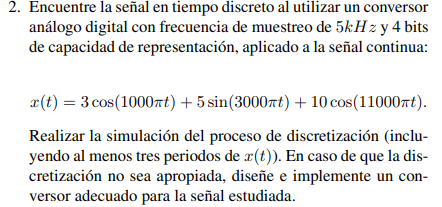

--- 1. Simulación con el Conversor Inadecuado ---
fs = 5 kHz < 11 kHz (frecuencia de Nyquist) ==> Se producirá Aliasing.


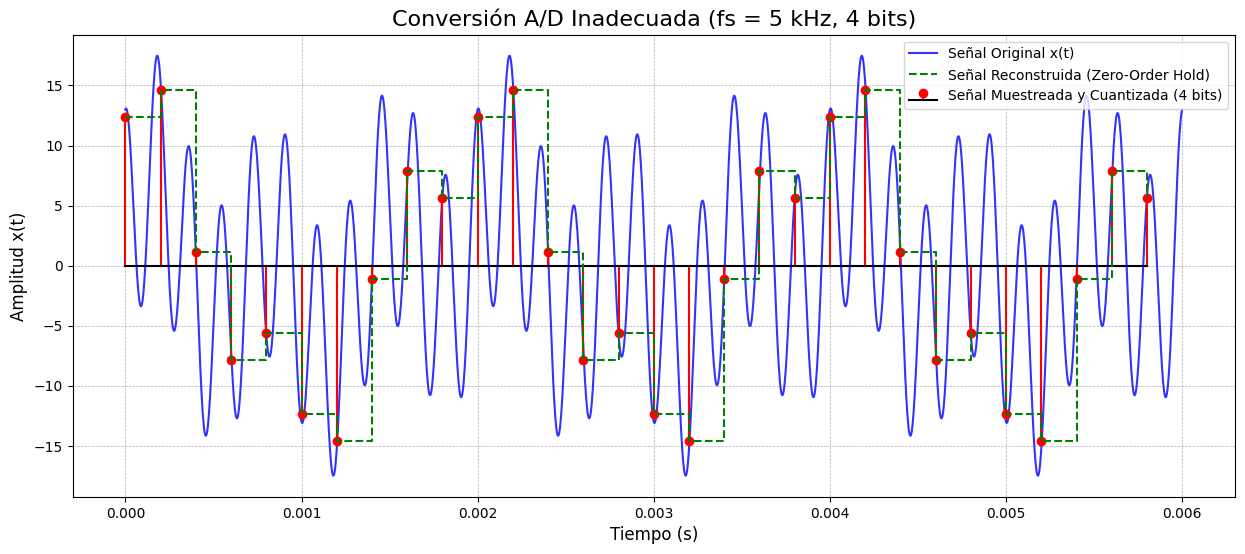


--- 2. Diseño y Simulación de un Conversor Adecuado ---
Nuevo diseño: fs = 22.0 kHz y 8 bits de resolución.


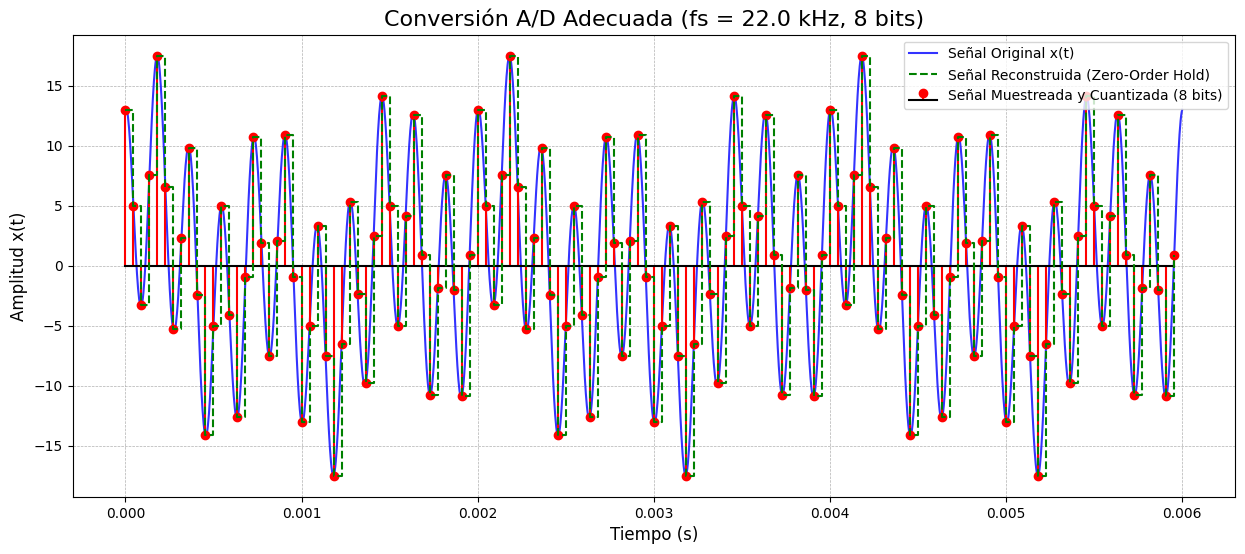

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definición de la señal continua ---
def x_t(t):
    """Define la señal continua x(t)."""
    return (3 * np.cos(1000 * np.pi * t) +
            5 * np.sin(3000 * np.pi * t) +
            10 * np.cos(11000 * np.pi * t))

# --- Función para simular el proceso de conversión A/D ---
def simular_conversion_ad(fs, bits, titulo):
    """
    Realiza la simulación del muestreo y cuantización de la señal x(t).

    Args:
        fs (int): Frecuencia de muestreo en Hz.
        bits (int): Número de bits del cuantizador.
        titulo (str): Título para el gráfico resultante.
    """
    # 1. Parámetros de simulación
    # La frecuencia fundamental de la señal es GCD(500, 1500, 5500) = 500 Hz.
    # El período fundamental es T = 1/500 = 0.002 segundos.
    # Simulamos 3 períodos para una buena visualización.
    t_final = 0.006

    # 2. Vector de tiempo para la señal continua (alta resolución para graficar)
    t_continuo = np.linspace(0, t_final, 2000)
    y_continuo = x_t(t_continuo)

    # 3. Proceso de MUESTREO
    # Vector de tiempo discreto
    t_muestreado = np.arange(0, t_final, 1/fs)
    y_muestreado = x_t(t_muestreado)

    # 4. Proceso de CUANTIZACIÓN
    # Rango dinámico de la señal (amplitud máxima teórica es 3+5+10=18)
    v_max = 18
    v_min = -18

    # Número de niveles de cuantización
    L = 2**bits
    # Tamaño del escalón de cuantización (resolución)
    delta = (v_max - v_min) / L

    # Aplicar la cuantización (se redondea al nivel más cercano)
    y_cuantizado = v_min + delta * (np.floor((y_muestreado - v_min) / delta) + 0.5)

    # 5. Gráfica de resultados
    plt.figure(figsize=(15, 6))

    # Graficar la señal continua original
    plt.plot(t_continuo, y_continuo, 'b-', label='Señal Original x(t)', alpha=0.8)

    # Graficar los puntos muestreados y cuantizados
    plt.stem(t_muestreado, y_cuantizado, linefmt='r-', markerfmt='ro', basefmt='k',
             label=f'Señal Muestreada y Cuantizada ({bits} bits)')

    # Graficar la señal reconstruida (mediante retenedor de orden cero)
    plt.step(t_muestreado, y_cuantizado, 'g--', where='post',
             label='Señal Reconstruida (Zero-Order Hold)')

    plt.title(titulo, fontsize=16)
    plt.xlabel('Tiempo (s)', fontsize=12)
    plt.ylabel('Amplitud x(t)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

# --- Parte 1: Simulación con el conversor dado (INADECUADO) ---
print("--- 1. Simulación con el Conversor Inadecuado ---")
print("fs = 5 kHz < 11 kHz (frecuencia de Nyquist) ==> Se producirá Aliasing.")
simular_conversion_ad(fs=5000, bits=4, titulo='Conversión A/D Inadecuada (fs = 5 kHz, 4 bits)')

# --- Parte 2: Diseño y simulación de un conversor ADECUADO ---
print("\n--- 2. Diseño y Simulación de un Conversor Adecuado ---")
# Para un diseño adecuado, necesitamos:
# a) Aumentar la frecuencia de muestreo por encima de la de Nyquist (11 kHz).
#    Elegimos fs = 22 kHz, que es el doble de la frecuencia mínima requerida.
# b) 4 bits es una resolución muy baja, lo que provoca un gran error de cuantización.
#    Aunque no se pide, un buen diseño aumentaría los bits (e.g., a 8 o 12).
#    Aquí simulamos con fs corregida y mantenemos los 4 bits para comparar.
fs_adecuada = 22000
bits_adecuados = 8 # Se propone 8 bits para una mejor calidad
print(f"Nuevo diseño: fs = {fs_adecuada/1000} kHz y {bits_adecuados} bits de resolución.")
simular_conversion_ad(fs=fs_adecuada, bits=bits_adecuados,
                      titulo=f'Conversión A/D Adecuada (fs = {fs_adecuada/1000} kHz, {bits_adecuados} bits)')

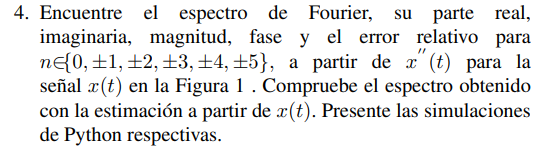
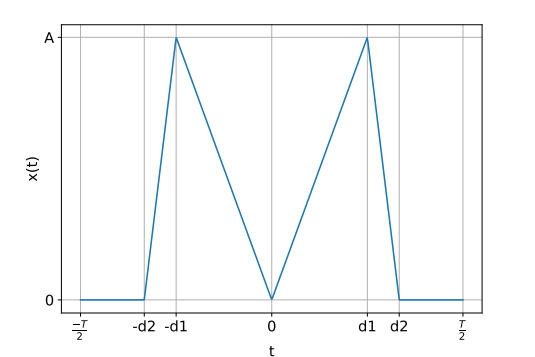

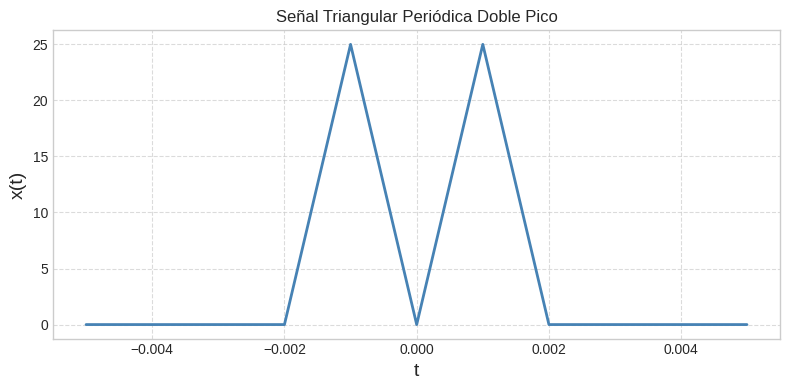

/tmp/ipython-input-2339300358.py:59: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Cn[n + N] = (1 / T) * np.trapz(x * np.exp(-1j * n * wo * tv), tv)


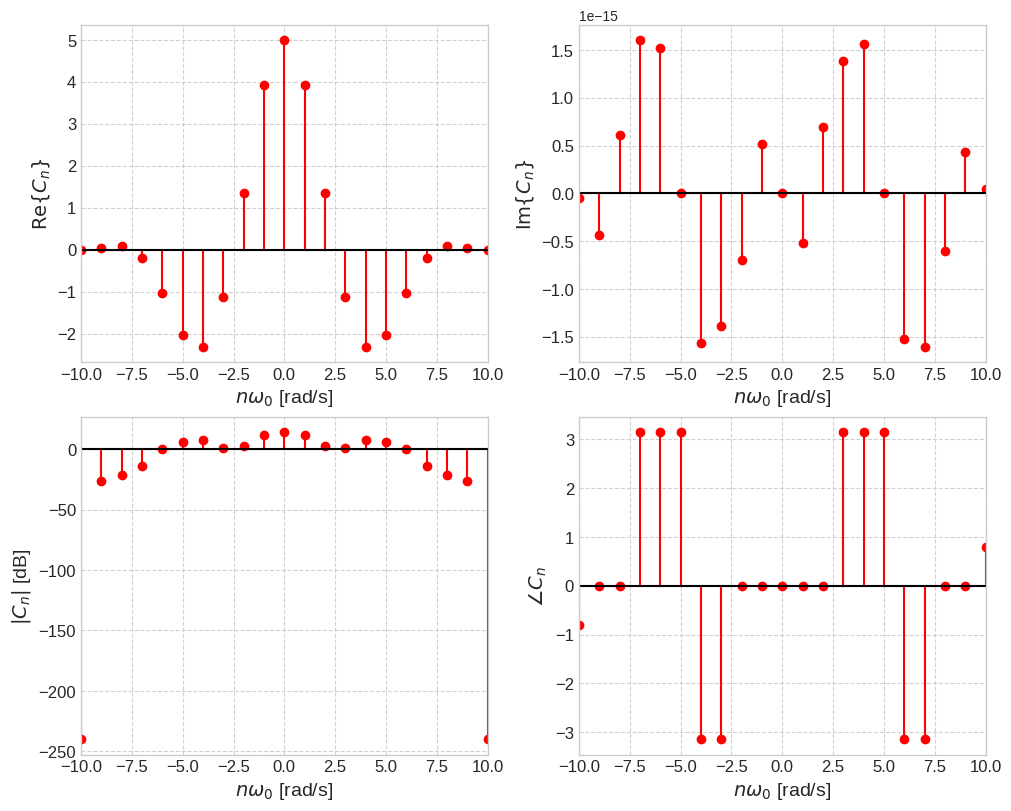

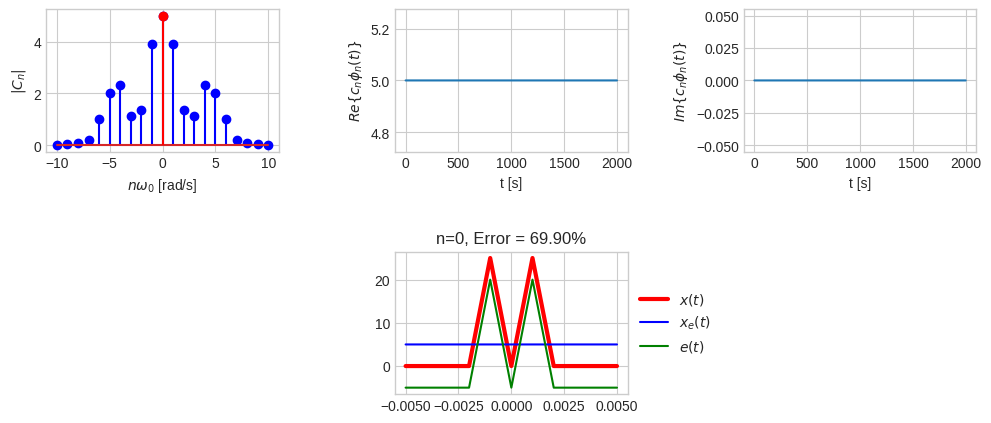

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad # Although not used in this specific cell, keeping for context if needed later
import pandas as pd # Although not used in this specific cell, keeping for context if needed later
import matplotlib.animation as animation # Import the animation module
from matplotlib import rc # Import the rc function

# Parámetros de la señal
A = 25
T = 1e-2  # periodo
Fo = 1 / T
Fs = 2000 * Fo  # frecuencia de muestreo
tv = np.arange(-T/2, T/2, 1/Fs)

# Puntos clave (iguales a los marcados en tu imagen)
d1 = 0.001
d2 = 0.002

# Definición de la señal triangular con dos picos positivos
x = np.zeros_like(tv)
for i, t in enumerate(tv):
    if -d2 <= t < -d1:
        x[i] = (A / (d2 - d1)) * (t + d2)      # sube de 0 a A
    elif -d1 <= t < 0:
        x[i] = (-A / d1) * t                   # baja de A a 0
    elif 0 <= t < d1:
        x[i] = (A / d1) * t                    # sube de 0 a A
    elif d1 <= t < d2:
        x[i] = (-A / (d2 - d1)) * (t - d1) + A # baja de A a 0
    else:
        x[i] = 0

# Graficar
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tv, x, color='steelblue', linewidth=2)
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('x(t)', fontsize=14)
ax.set_title('Señal Triangular Periódica Doble Pico')
ax.grid(True, which='both', linestyle='--', linewidth=0.8, alpha=0.7)
plt.tight_layout()
plt.show()

# ======================
# SERIE DE FOURIER
# ======================

# Parámetros de la serie
N = 10  # número de armónicos
wo = 2 * np.pi / T  # frecuencia angular fundamental

# Definir bases complejas e^{jnw0t}
phin = np.zeros((len(tv), 2 * N + 1), dtype=np.complex128)
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)

# Calcular los coeficientes Cn numéricamente
Cn = np.zeros(2 * N + 1, dtype=np.complex128)
for n in range(-N, N + 1):
    Cn[n + N] = (1 / T) * np.trapz(x * np.exp(-1j * n * wo * tv), tv)

nv = np.linspace(-N, N, 2 * N + 1)

# ======================
# GRÁFICAS DEL ESPECTRO
# ======================

fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

axs[0, 0].stem(nv, np.real(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[0, 0].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
axs[0, 0].set_ylabel(r'$\mathrm{Re}\{C_n\}$', fontsize=14)
axs[0, 0].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

axs[0, 1].stem(nv, np.imag(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[0, 1].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
axs[0, 1].set_ylabel(r'$\mathrm{Im}\{C_n\}$', fontsize=14)
axs[0, 1].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

axs[1, 0].stem(nv, 20 * np.log10(np.abs(Cn) + 1e-12), linefmt='r', markerfmt='ro', basefmt='k')
axs[1, 0].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
axs[1, 0].set_ylabel(r'$|C_n|$ [dB]', fontsize=14)
axs[1, 0].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

axs[1, 1].stem(nv, np.angle(Cn), linefmt='r', markerfmt='ro', basefmt='k')
axs[1, 1].set_xlabel(r'$n\omega_0$ [rad/s]', fontsize=14)
axs[1, 1].set_ylabel(r'$\angle C_n$', fontsize=14)
axs[1, 1].grid(True, linestyle='--', linewidth=0.8, alpha=0.9)

for ax in axs.flat:
    ax.tick_params(labelsize=12)
    ax.set_xlim([nv[0], nv[-1]])

plt.show()

# ======================
# ANIMACIÓN DE RECONSTRUCCIÓN
# ======================

Px = np.sum(np.abs(Cn)**2)

fig, ax = plt.subplots(2, 3, figsize=(12, 5))

def update(n):
    ax[0, 0].clear()
    ax[0, 1].clear()
    ax[0, 2].clear()
    ax[1, 0].clear()
    ax[1, 1].clear()
    ax[1, 2].clear()

    ind = np.arange(N - n, N + n + 1)
    ax[0, 0].stem(nv, abs(Cn), 'b')
    ax[0, 0].stem(nv[ind], abs(Cn[ind]), 'r')
    ax[0, 0].set_xlabel(r'$n\omega_0$ [rad/s]')
    ax[0, 0].set_ylabel(r'$|C_n|$')

    ce = (phin[:, ind]).dot(np.diag(Cn[ind]))
    ax[0, 1].plot(np.real(ce))
    ax[0, 1].set_xlabel('t [s]')
    ax[0, 1].set_ylabel(r'$Re\{c_n\phi_n(t)\}$') # Fixed escape sequence

    ax[0, 2].plot(np.imag(ce))
    ax[0, 2].set_xlabel('t [s]')
    ax[0, 2].set_ylabel(r'$Im\{c_n\phi_n(t)\}$') # Fixed escape sequence

    xe = (phin[:, ind]).dot(Cn[ind])
    et = x - xe
    er = 1 - ((np.sum(abs(Cn[ind])**2)) / Px)

    ax[1, 1].plot(tv, x, 'r', linewidth=3, label='$x(t)$')
    ax[1, 1].plot(tv, np.real(xe), 'b', label='$x_e(t)$')
    ax[1, 1].plot(tv, np.real(et), 'g', label='$e(t)$')
    ax[1, 1].set_title(f'n={n}, Error = {100*er:.2f}%')
    ax[1, 1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1, 0].axis('off')
    ax[1, 2].axis('off')
    plt.subplots_adjust(wspace=0.5, hspace=0.7)

anim = animation.FuncAnimation(fig, update, frames=np.arange(0, N + 1, 1), blit=False)
rc('animation', html='jshtml')

anim